In [1]:
from dash import Dash, html, dcc, callback, Output, Input
import dash_bootstrap_components as dbc
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
import phoeniks as pk

In [2]:
filename = "Data/new_data/VertSweep_320V_10^7VpA_purged_tc5ms_Gathering_Quartz_ref.dat"
time, rawdata, stats, unique_values = pk.reader.read_VertFile(filename)



In [3]:
data = pk.thz_data.Data(time = time, 
                        td_reference = stats[50]['mean'], 
                        td_sample = stats[20]['mean'],
                        thickness = 2.2e-3,
                        td_ref_std = stats[50]['std_dev'],
                        td_samp_std = stats[20]['std_dev'])

In [18]:
data.td_reference = data.linear_offset(data.td_reference)
data.td_sample = data.linear_offset(data.td_sample)
data.offset_time_to_reference_peak()

In [19]:
# run iteractive interface
data.generate_layout()
data.app.run_server(jupyter_mode='tab')

Dash app running on http://127.0.0.1:8050/


<IPython.core.display.Javascript object>

c:\Users\eenadbu\PortableApps\Git\phoeniks\phoeniks\thz_data.py:297: RuntimeWarning:

invalid value encountered in log



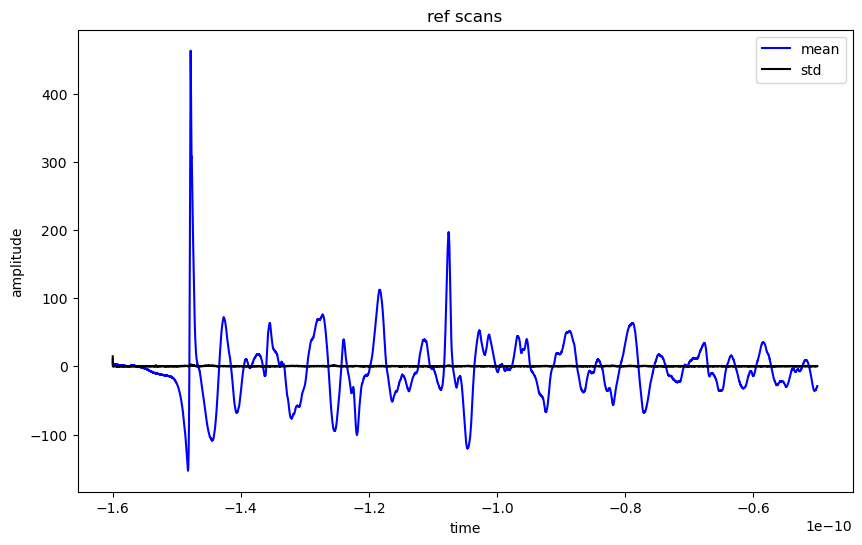

In [4]:
import matplotlib.pyplot as plt


# Create the plot
plt.figure(figsize=(10, 6))

# Plot the first trace
plt.plot(data.time, data.td_reference, label='mean', color='blue')

# Plot the second trace
plt.plot(data.time, data.td_ref_std, label='std', color='black')

# Add title and labels
plt.title('ref scans')
plt.xlabel('time')
plt.ylabel('amplitude')

# Add a legend
plt.legend()

# Show the plot
plt.show()


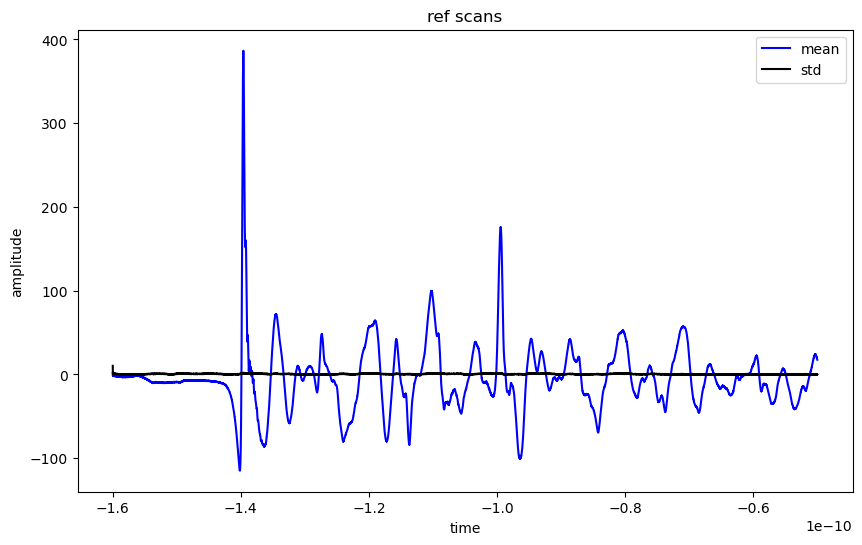

In [5]:
import matplotlib.pyplot as plt


# Create the plot
plt.figure(figsize=(10, 6))

# Plot the first trace
plt.plot(data.time, data.td_sample, label='mean', color='blue')

# Plot the second trace
plt.plot(data.time, data.td_samp_std, label='std', color='black')

# Add title and labels
plt.title('ref scans')
plt.xlabel('time')
plt.ylabel('amplitude')

# Add a legend
plt.legend()

# Show the plot
plt.show()
